# Import Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline  


# Read Data

In [3]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

# Seperate the Data

In [4]:
yy=train[['type']]
x=train.drop(columns=['type','fiberID'])
pred=test.drop(columns=['fiberID'])

col_name=x.columns

#col_name=[col_name]


In [5]:
path='./data/column_name.txt'

with open(path, 'w') as f:
    for i in range(len(col_name)):
        f.write(col_name[i])
        f.write('\n')    

# Brief Data Analysis

### Check the missing value

In [ ]:
# print(x.info(),'\n\n')
# print(yy.info(),'\n\n')

### Check Information

In [ ]:
# print(x.describe(),'\n\n')
# print(yy.describe(),'\n\n')

# Check Correlation

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(data = x.corr(), annot=True, 
fmt = '.2f', linewidths=.8, cmap='Reds')

# Boxplot

In [ ]:
plt.figure(figsize=(15,55))

for i in range(0,20):
    
    try:
        plt.subplot(7,3,i+1)
        x.boxplot(column=[col_name[i]], notch=False, sym='+', vert=True, whis=3.)       
    except:
        pass
    
plt.show()

# DataFrame to NumPy array

In [7]:
x_tmp = np.array(x)
y_tmp = np.array(yy)

# Original Plot

--------------------------------------------------------------------------------
이름: psfMag_u  &  평균: -6.750145805361198
이름: psfMag_g  &  평균: 18.675373101662096
이름: psfMag_r  &  평균: 18.40123547006451
이름: psfMag_i  &  평균: 18.04349490152059
이름: psfMag_z  &  평균: 17.663526090288872
이름: fiberMag_u  &  평균: 10.84985837857627
이름: fiberMag_g  &  평균: 19.07269250140955
이름: fiberMag_r  &  평균: 19.13448315888405
이름: fiberMag_i  &  평균: 18.18333145132197
이름: fiberMag_z  &  평균: 18.000882389116164
이름: petroMag_u  &  평균: 21.837902579534035
이름: petroMag_g  &  평균: 18.4541357115328
이름: petroMag_r  &  평균: 18.481524936174615
이름: petroMag_i  &  평균: 17.6866173575942
이름: petroMag_z  &  평균: 17.699206538921462
이름: modelMag_u  &  평균: 20.110990561637568
이름: modelMag_g  &  평균: 18.544374997755487
이름: modelMag_r  &  평균: 18.181544355607336
이름: modelMag_i  &  평균: 17.692395006077657
이름: modelMag_z  &  평균: 17.18928116565658


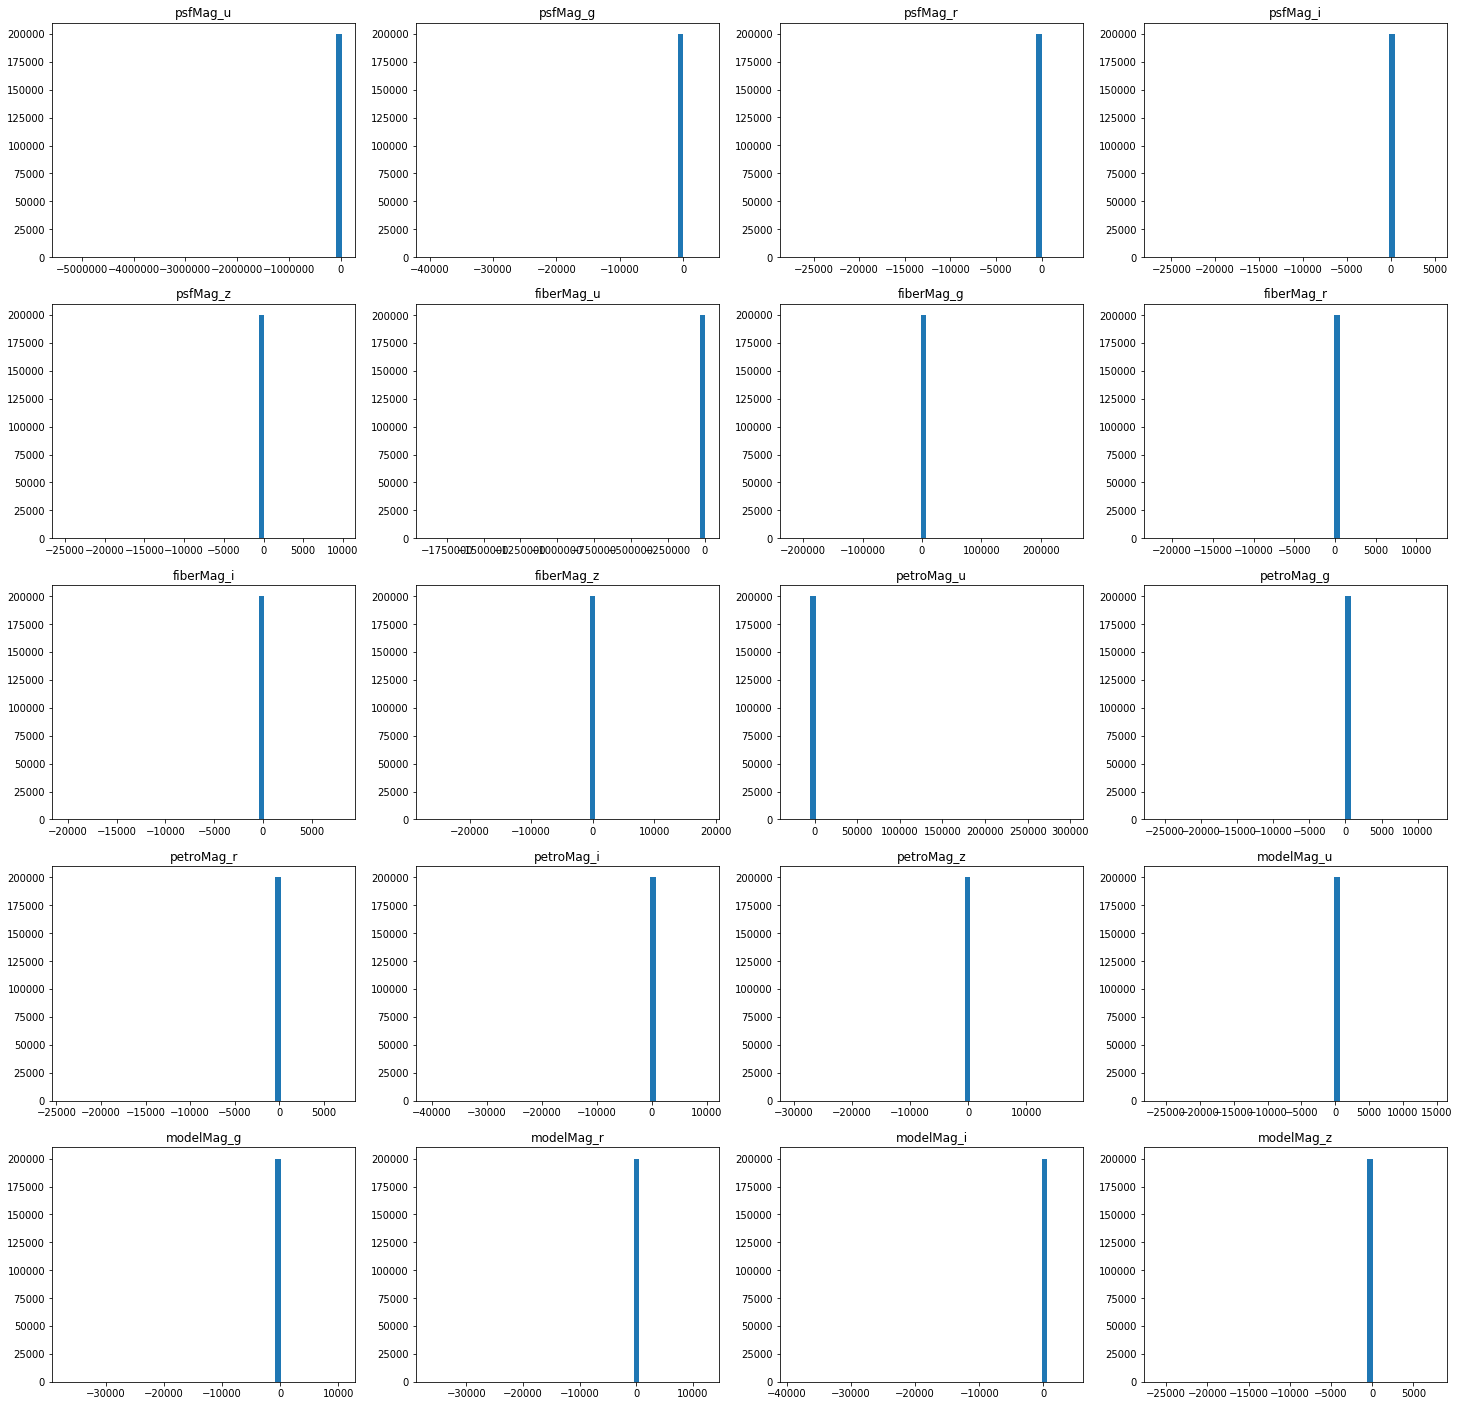

In [46]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(25,25))

scaler1 = StandardScaler()

print('-'*80)

for i in range(0,20):
   
    xa_col=(x_tmp[:,i])
    xa_col=xa_col.reshape(-1,1)
    xa=xa_col

    plt.subplot(5,4,i+1)
    plt.hist(xa,bins=50)
    plt.gca().set_title(col_name[i])
    
    print('이름: {}  &  평균: {}'.format(col_name[i],xa.mean()))

plt.show()

# Apply StandardScaler and Plot

--------------------------------------------------------------------------------


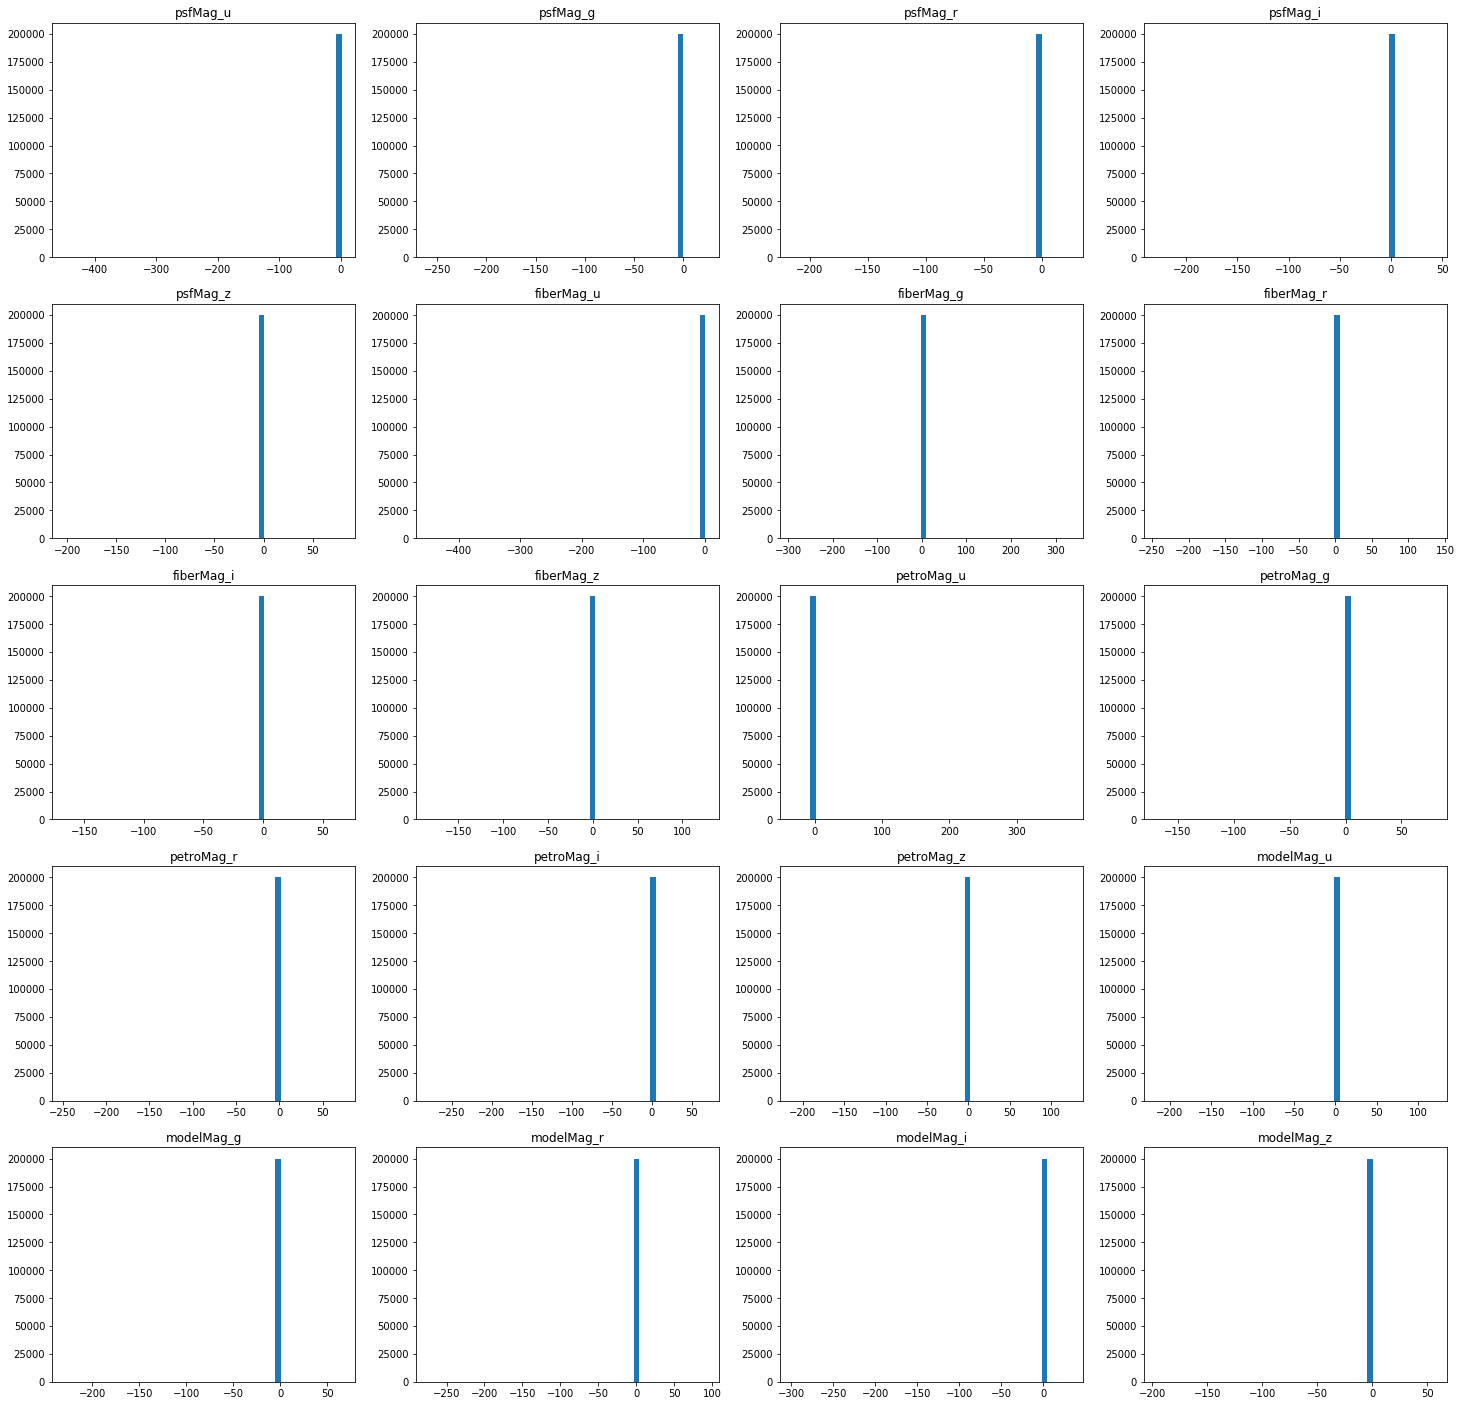

In [48]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(25,25))

scaler1 = StandardScaler()

print('-'*80)

for i in range(0,20):
   
    x_col=(x_tmp[:,i])
    x_col=x_col.reshape(-1,1)
    scaler1.fit(x_col)

    xx_temp = scaler1.transform(x_col)

    plt.subplot(5,4,i+1)
    plt.hist(xx_temp,bins=50)
    plt.gca().set_title(col_name[i])
                
plt.show()

# Apply RobustScaler and Plot

--------------------------------------------------------------------------------


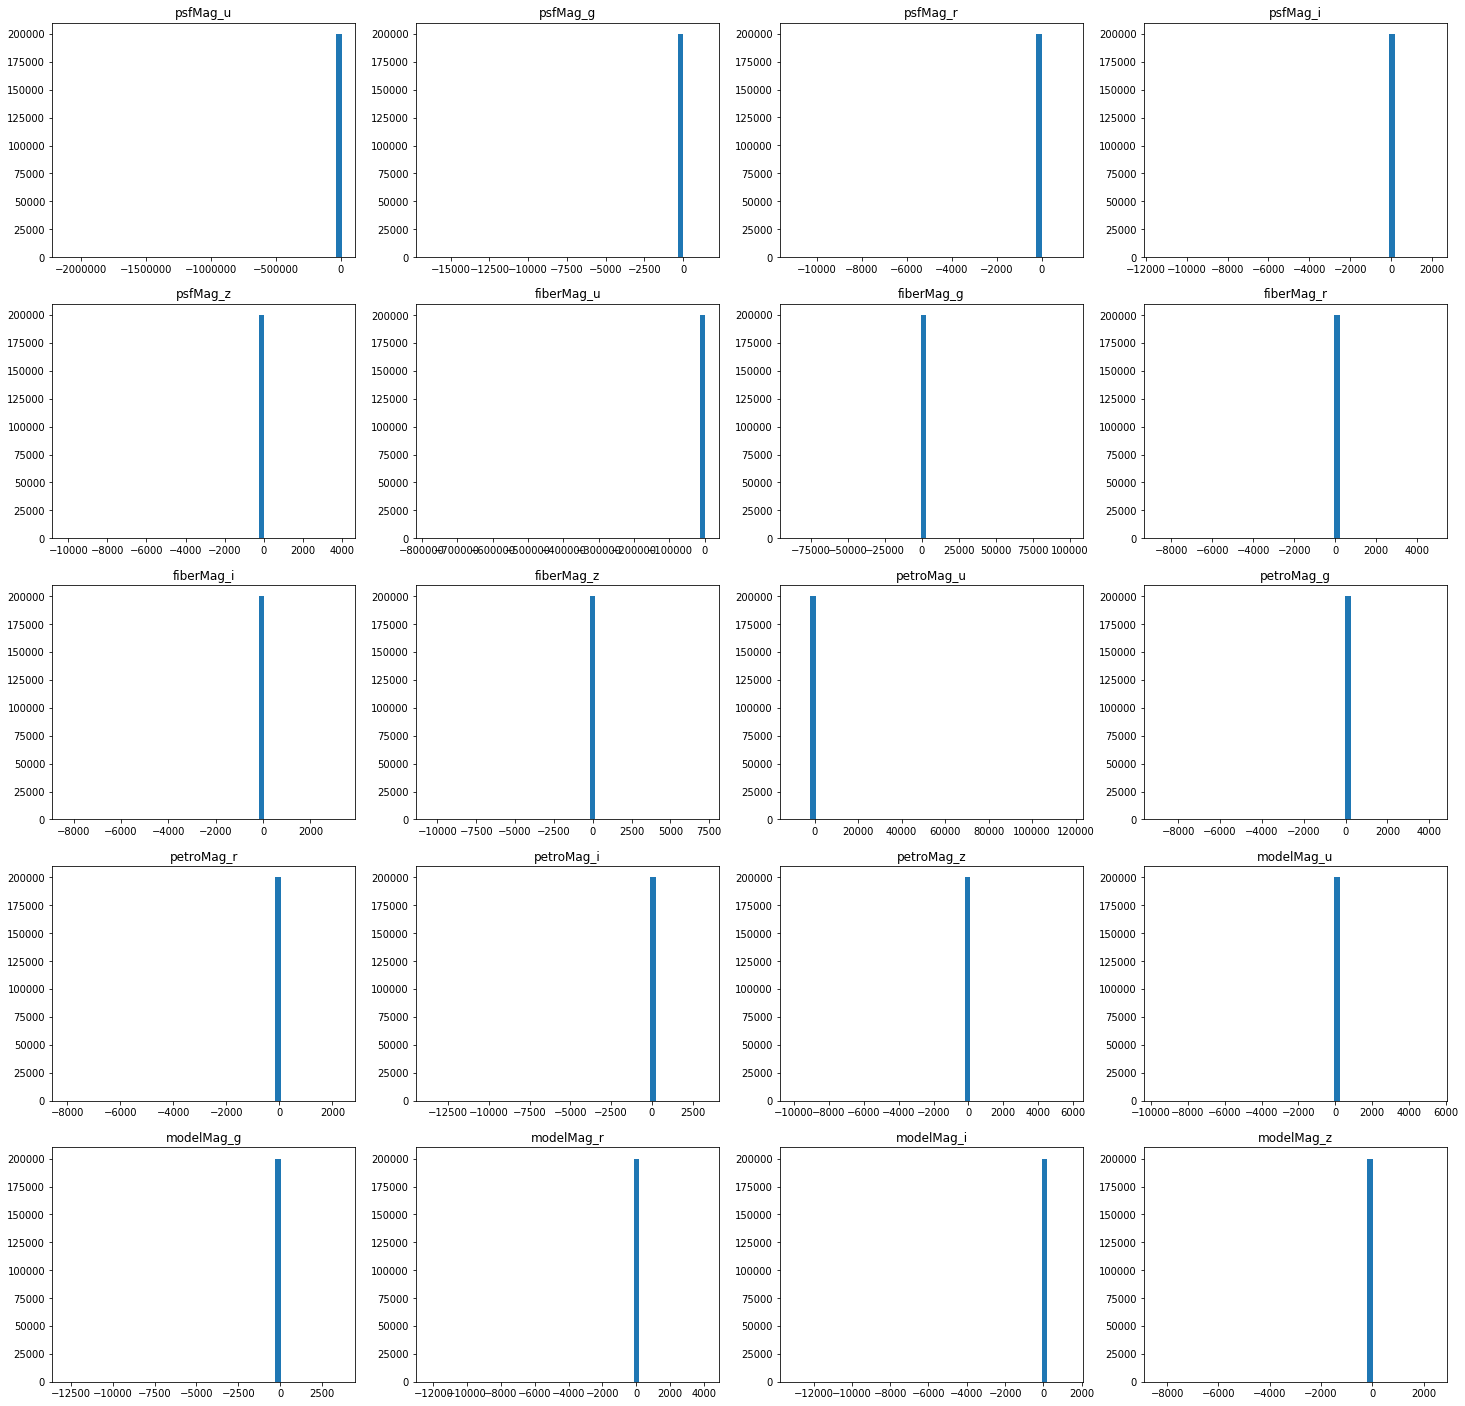

In [49]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))

scaler2 =  RobustScaler()

print('-'*80)

for i in range(0,20):
   
    x2_col=(x_tmp[:,i])
    x2_col=x2_col.reshape(-1,1)
    scaler2.fit(x2_col)

    x2_temp = scaler2.transform(x2_col)

    plt.subplot(5,4,i+1)
    plt.hist(x2_temp,bins=50)
    plt.gca().set_title(col_name[i])
                
plt.show()

# LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(yy)
y=enc.transform(yy)

# Change to NumPy Array and Save

In [ ]:
x=np.array(x)
y=np.array(y)
pred=np.array(pred)

np.save('./data/x.npy',arr=x)
np.save('./data/y.npy',arr=y)
np.save('./data/pred.npy',arr=pred)